<a href="https://colab.research.google.com/github/Unessam/Keras-exercises/blob/main/Clinical_test(simple%20DP%20modeling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [74]:
train_labels=[]
train_samples=[]

In [75]:
for i in range(50):
  random_younger=randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older=randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  random_younger=randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older=randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(1)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


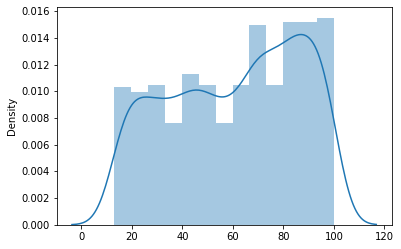

In [76]:
sns.distplot(train_samples)
plt.show()

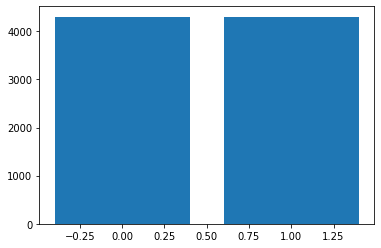

In [19]:
plt.bar(train_labels, len(train_labels))
plt.show()

In [77]:
train_samples=np.array(train_samples)
train_labels=np.array(train_labels)
train_samples, train_labels= shuffle(train_samples, train_labels)

In [78]:
scaler=MinMaxScaler(feature_range=(0, 1))
scaled_train_samples=scaler.fit_transform(train_samples.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


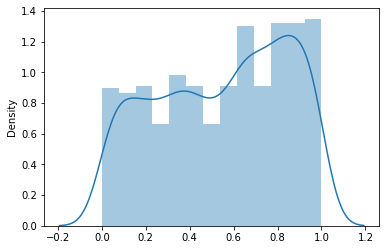

In [79]:
sns.distplot(scaled_train_samples)
plt.show()

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [37]:
scaled_train_samples.shape

(4301, 1)

In [80]:
model=Sequential()
model.add(Dense(units=16, input_shape=(1, ), activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [82]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.6783 - accuracy: 0.5370 - val_loss: 0.6635 - val_accuracy: 0.6667
Epoch 2/30
189/189 - 0s - loss: 0.6609 - accuracy: 0.6503 - val_loss: 0.6408 - val_accuracy: 0.7381
Epoch 3/30
189/189 - 0s - loss: 0.6398 - accuracy: 0.7011 - val_loss: 0.6160 - val_accuracy: 0.7667
Epoch 4/30
189/189 - 0s - loss: 0.6154 - accuracy: 0.7534 - val_loss: 0.5868 - val_accuracy: 0.7905
Epoch 5/30
189/189 - 0s - loss: 0.5881 - accuracy: 0.7672 - val_loss: 0.5566 - val_accuracy: 0.8048
Epoch 6/30
189/189 - 0s - loss: 0.5580 - accuracy: 0.8037 - val_loss: 0.5235 - val_accuracy: 0.8286
Epoch 7/30
189/189 - 0s - loss: 0.5267 - accuracy: 0.8286 - val_loss: 0.4929 - val_accuracy: 0.8667
Epoch 8/30
189/189 - 0s - loss: 0.4957 - accuracy: 0.8450 - val_loss: 0.4621 - val_accuracy: 0.8857
Epoch 9/30
189/189 - 0s - loss: 0.4657 - accuracy: 0.8593 - val_loss: 0.4353 - val_accuracy: 0.9048
Epoch 10/30
189/189 - 0s - loss: 0.4375 - accuracy: 0.8804 - val_loss: 0.4078 - val_accuracy: 0.9048

In [108]:
test_labels=[]
test_samples=[]
for i in range(10):
  random_younger=randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older=randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(0)
for i in range(200):
  random_younger=randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(0)

  random_older=randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


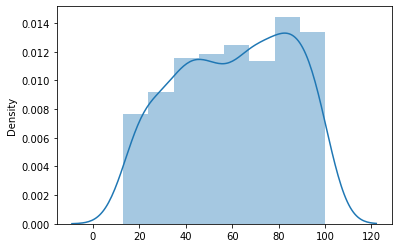

In [109]:
sns.distplot(test_samples)
plt.show()

In [110]:
test_samples=np.array(test_samples)
test_labels=np.array(test_labels)
test_samples, test_labels=shuffle(test_samples, test_labels)

In [111]:
scaled_test_samples=scaler.fit_transform(test_samples.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


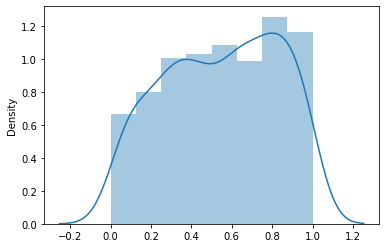

In [112]:
sns.distplot(scaled_test_samples)
plt.show()

In [113]:
prediction=model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [114]:
prediction.shape

(420, 2)

In [115]:
#np.argmax(a,axis= 2 or -1) returns (500,) with values from 0 to 1
#argmax returns the position of the largest value. max returns the largest value.
rounded_predictions=np.argmax(prediction, axis=-1)

In [116]:
rounded_predictions

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,

In [94]:
# to compare the pridictions to test_labels and evaluate the result we should you the confusion matrix.
from sklearn.metrics import confusion_matrix
import itertools

In [117]:
cm=confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [107]:
cm

array([[198,  52],
       [ 50, 200]])

In [105]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  if normalize:
    cm=cm.astype(float)/cm.sum(axis=1)[:np.newaxis]
    print('normalized confusion matrix')
  else:
    print('confusion matrix, without normalization')
  print(cm)

  thresh=cm.max()/ 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(i, j, cm[i, j], horizontalalignment='center', color='white' if cm[i, j]> thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

confusion matrix, without normalization
[[199  11]
 [ 10 200]]


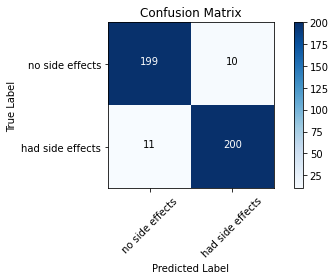

In [118]:
cm_plot_labels=['no side effects', 'had side effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')